In [1]:
from numpy import *
from scipy import *

In [2]:
from scipy.integrate import quad, dblquad, tplquad

In [4]:
# define a simple function for the integrand
def f(x):
    return x

x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print "integral value =", val, ", absolute error =", abserr

 integral value = 0.5 , absolute error = 5.55111512313e-15


In [5]:
val, abserr = quad(lambda x: exp(-x**2), -Inf, Inf)
print "numerical =", val, abserr

analytical = sqrt(pi)
print "analytical =", analytical

numerical = 1.77245385091 1.42026367818e-08
analytical = 1.77245385091


In [6]:
def integrand(x, y):
    return exp(-x**2 - y**2)

x_lower = 0
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print val, abserr

0.785398163397 2.13695246107e-13


In [7]:
# solve ODEs
from scipy.integrate import odeint, ode

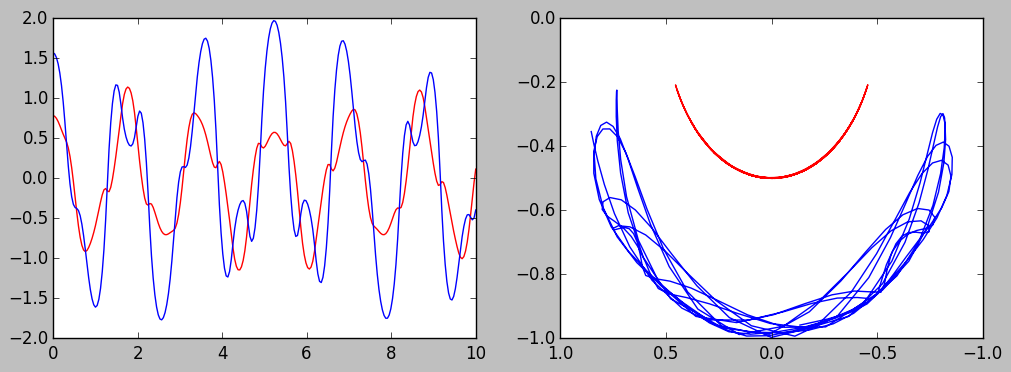

In [10]:
# example of double_pendulum
%matplotlib qt

import matplotlib.pyplot as plt

g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2)*(2*x3 - 3*cos(x1-x2)*x4)/(16 - 9*cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2)*(8*x4 - 3*cos(x1-x2)*x3)/(16 - 9*cos(x1-x2)**2)
    dx3 = -0.5*m*L**2*(dx1*dx2*sin(x1-x2) + 3*(g/L)*sin(x1))
    dx4 = -0.5*m*L**2*(-dx1*dx2*sin(x1-x2) + (g/L)*sin(x2))
    
    return [dx1, dx2, dx3, dx4]

# choose an initial state
x0 = [pi/4, pi/2, 0, 0]

# time coodinate to solve the ODE for: from 0 to 10 seconds
t = linspace(0, 10, 250)

# solve the ODE problem
x = odeint(dx, x0, t)

# plot the angles as a function of time

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label = "theta1")
axes[0].plot(t, x[:, 1], 'b', label = "theta2")

x1 = + L*sin(x[:, 0])
y1 = - L*cos(x[:, 0])

x2 = x1 + L*sin(x[:, 1])
y2 = y1 - L*cos(x[:, 1])

axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

fig


In [11]:
from IPython.display import clear_output
import time


fig, ax = plt.subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):

    x1 = + L * sin(x[t_idx, 0])
    y1 = - L * cos(x[t_idx, 0])

    x2 = x1 + L * sin(x[t_idx, 1])
    y2 = y1 - L * cos(x[t_idx, 1])

    ax.cla()    
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])

    display(fig)
    clear_output()

    time.sleep(0.1)

fig

NameError: name 'display' is not defined

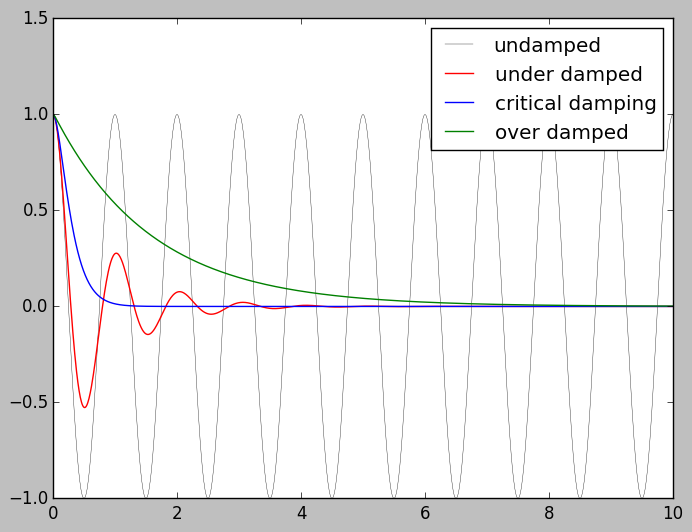

In [12]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]

    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]


# initial state: 
y0 = [1.0, 0.0]


# time coodinate to solve the ODE for
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0


# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped


fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

fig

In [13]:
from scipy.fftpack import *

In [15]:
from scipy.fftpack import *
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)


fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

fig

NameError: name 'fftfreq' is not defined